# Social Relationships in Twitter during the Gravitational Waves Discovery in 2016

## Multiplex networks

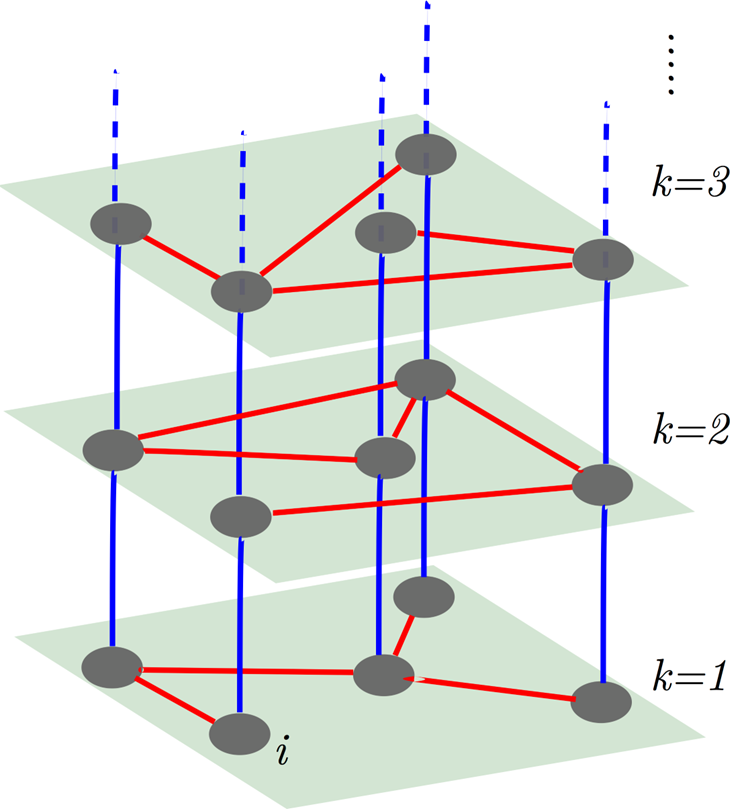

## Other Definitions 🙃

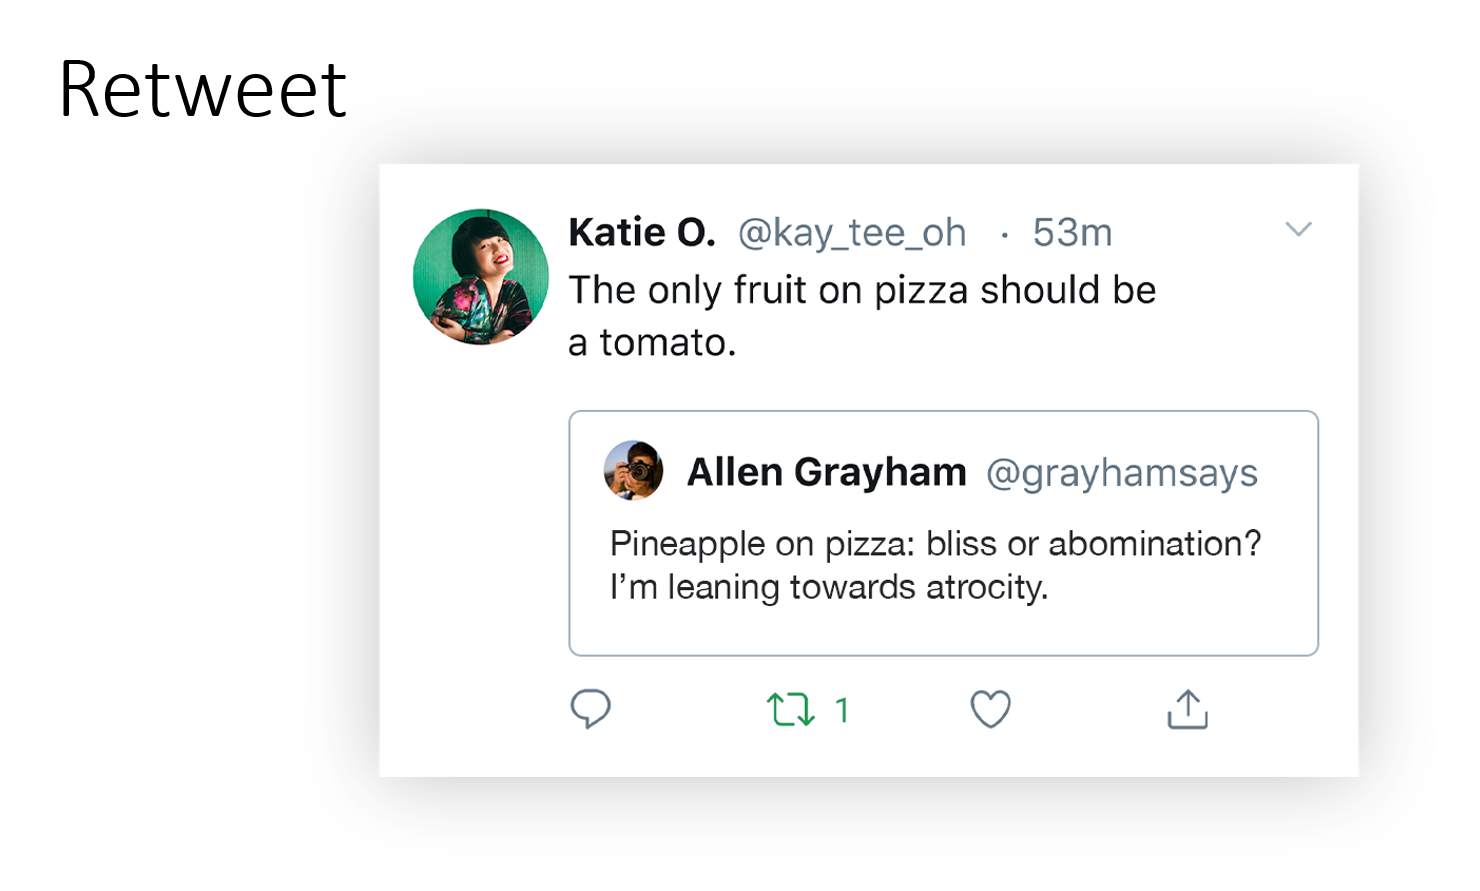

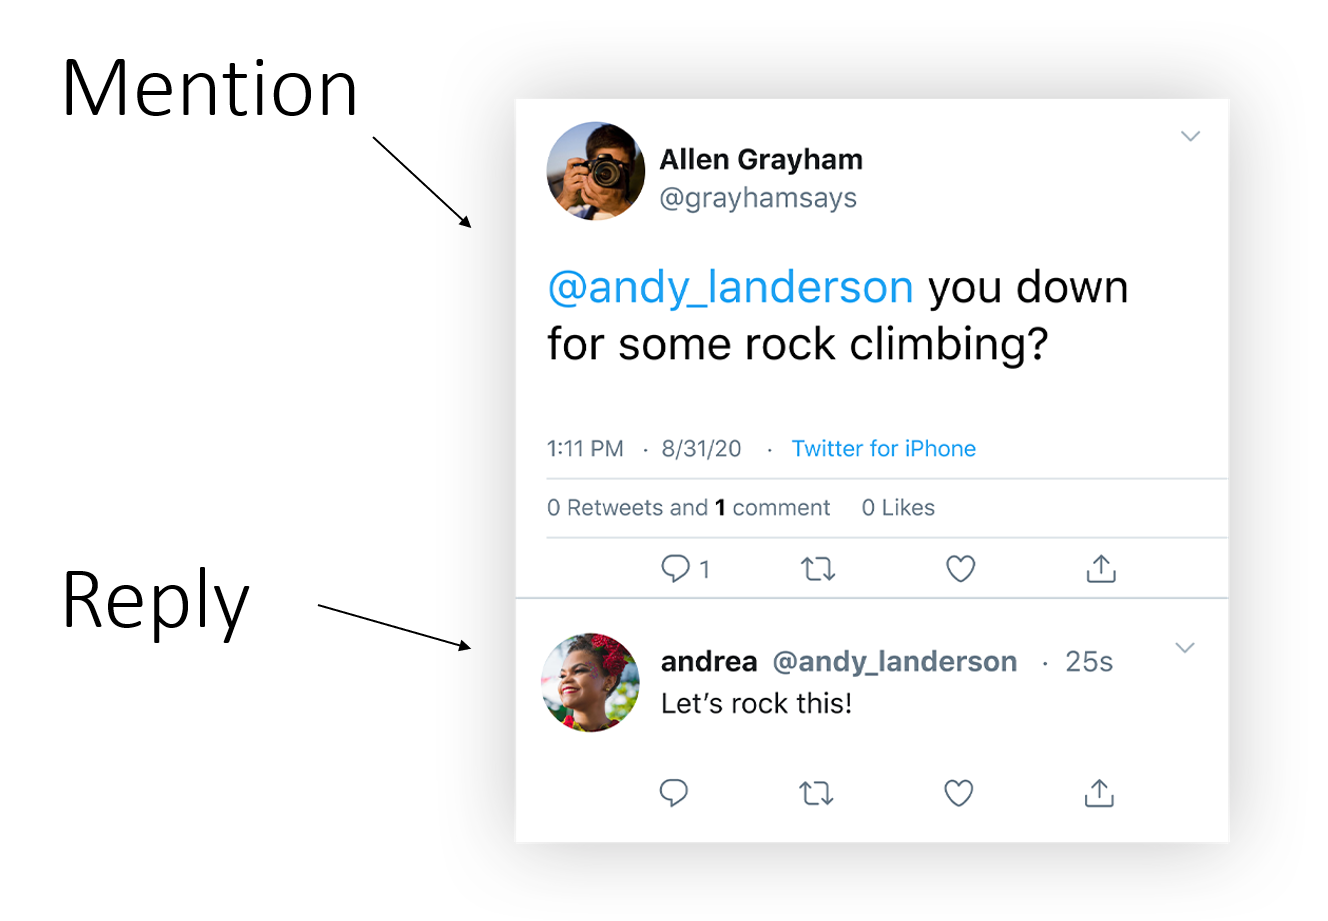

## Data Imports

In [202]:
from copy import deepcopy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
edges = pd.read_csv(
    'GRAVITATIONAL_WAVES_2016_Multiplex_Social/Dataset/GRAVITATIONAL_WAVES_2016_multiplex.edges',
    sep=' ',
    names=['layer', 'source', 'target', 'weight'],
)

In [12]:
edges.head()

,layer,source,target,weight
0,1,1,3,1
1,1,1,17415,1
2,1,1,9262,1
3,1,1,1088,1
4,1,1,26433,1


In [13]:
retweets_df = edges.loc[edges.layer == 1, :].drop(columns='layer')
mentions_df = edges.loc[edges.layer == 2, :].drop(columns='layer')
replies_df = edges.loc[edges.layer == 3, :].drop(columns='layer')
del edges

In [4]:
retweets = nx.from_pandas_edgelist(
    retweets_df,
    edge_attr='weight',
    create_using=nx.DiGraph,
)

In [5]:
mentions = nx.from_pandas_edgelist(
    mentions_df,
    edge_attr='weight',
    create_using=nx.DiGraph,
)

In [6]:
replies = nx.from_pandas_edgelist(
    replies_df,
    edge_attr='weight',
    create_using=nx.DiGraph,
)

## Visualize

In [7]:
cutoff = 10

In [8]:
retweets_demo = nx.from_pandas_edgelist(
    retweets_df.loc[(retweets_df.source <= cutoff) & (retweets_df.target <= cutoff)],
    edge_attr='weight',
    create_using=nx.DiGraph,
)
mentions_demo = nx.from_pandas_edgelist(
    mentions_df.loc[(mentions_df.source <= cutoff) & (mentions_df.target <= cutoff)],
    edge_attr='weight',
    create_using=nx.DiGraph,
)
replies_demo = nx.from_pandas_edgelist(
    replies_df.loc[(replies_df.source <= cutoff) & (replies_df.target <= cutoff)],
    edge_attr='weight',
    create_using=nx.DiGraph,
)

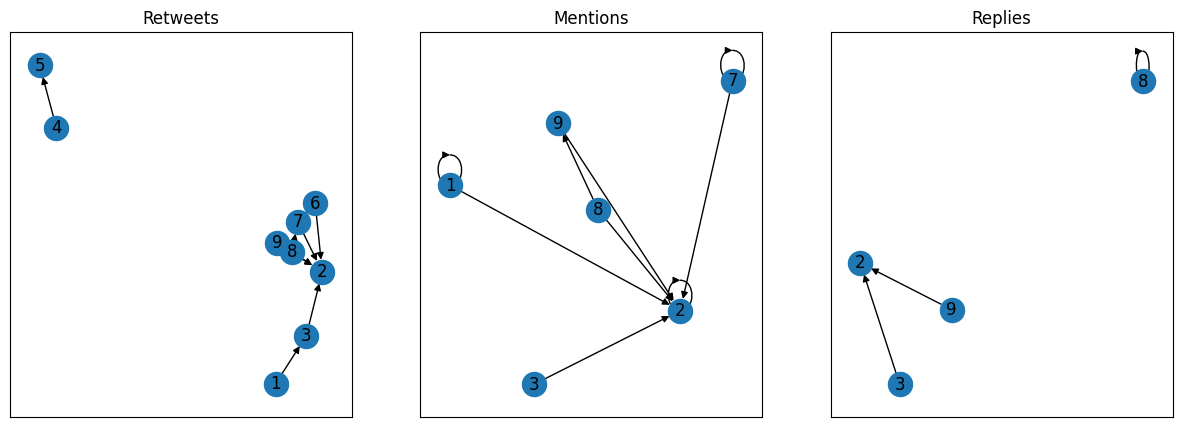

In [9]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, g, lbl in zip(axes, [retweets_demo, mentions_demo, replies_demo], ['Retweets', 'Mentions', 'Replies']):
    # nx.draw_networkx(g, ax=ax, node_size=100, font_size=7)
    nx.draw_networkx(g, ax=ax)
    ax.set_title(lbl)

## Size

In [10]:
len(retweets.nodes), len(mentions.nodes), len(replies.nodes)

(321307, 118282, 23826)

In [106]:
len(retweets.edges), len(mentions.edges), len(replies.edges)

(443548, 170764, 17945)

In [248]:
nx.density(retweets), nx.density(mentions), nx.density(replies)

(4.296369279396187e-06, 1.220569946550357e-05, 3.161254174965069e-05)

## Weights

In [108]:
retweets_df.weight.describe()

count    443548.000000
mean          1.184242
std           1.314011
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         280.000000
Name: weight, dtype: float64

In [109]:
mentions_df.weight.describe()

count    170764.000000
mean          1.153276
std           0.936592
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         150.000000
Name: weight, dtype: float64

In [110]:
replies_df.weight.describe()

count    17945.000000
mean         1.128058
std          0.794041
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         43.000000
Name: weight, dtype: float64

## Cycles and Self-Loops

In [17]:
list(nx.selfloop_edges(retweets))

[]

In [33]:
sledges_mentions = len(list(nx.selfloop_edges(mentions)))
print(f'{sledges_mentions} ({sledges_mentions / len(mentions) * 100:.1f}%) self-mentions')

3205 (2.7%) self-mentions


In [34]:
sledges_replies = len(list(nx.selfloop_edges(replies)))
print(f'{sledges_replies} ({sledges_replies / len(replies) * 100:.1f}%) self-replies')

1705 (7.2%) self-replies


Explanation: when you reply to a tweet that mentions you, you automatically mention yourself.

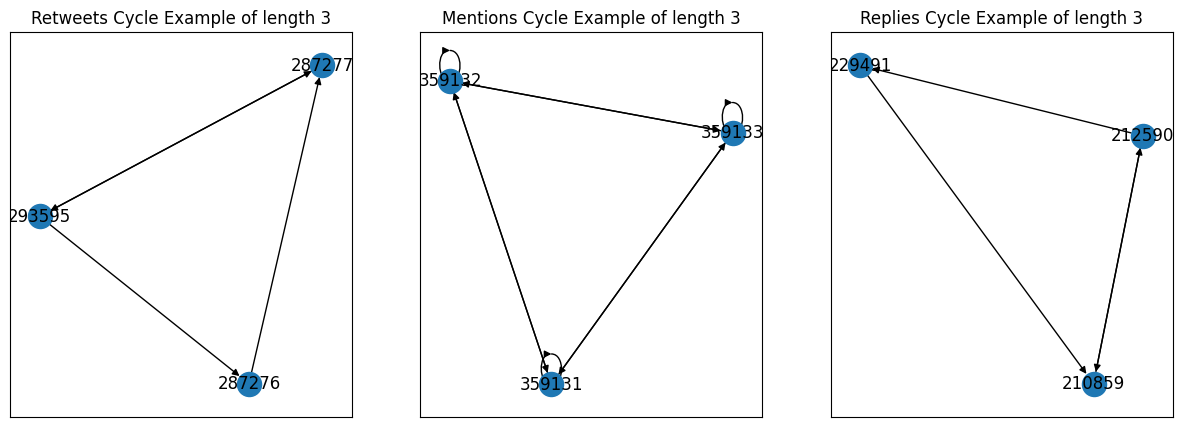

In [52]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, g, lbl in zip(axes, [retweets, mentions, replies], ['Retweets', 'Mentions', 'Replies']):
    for cycle in nx.simple_cycles(g):
        if len(cycle) > 2:
            break
    nx.draw_networkx(g.subgraph(cycle), ax=ax)
    ax.set_title(f'{lbl} Cycle Example of length {len(cycle)}')

## Characteristic Distances

In [80]:
for g, lbl in zip([retweets, mentions, replies], ['Retweets', 'Mentions', 'Replies']):
    max_scc = max(nx.strongly_connected_components(g), key=len)
    subgraph = g.subgraph(max_scc)
    print(lbl)
    print(f'Length of the largest SCC: {len(max_scc)}')
    print(f'Diameter of the largest SCC: {nx.diameter(subgraph)}')
    print(f'For comparison, log({len(max_scc)}) = {np.log(len(max_scc))}')
    print()

Retweets
Length of the largest SCC: 1292
Diameter of the largest SCC: 21
For comparison, log(1292) = 7.163946684342547

Mentions
Length of the largest SCC: 941
Diameter of the largest SCC: 18
For comparison, log(941) = 6.846943139585379

Replies
Length of the largest SCC: 29
Diameter of the largest SCC: 12
For comparison, log(29) = 3.367295829986474



Distances are 3-4 times larger than the small-world expectations.

Explanation: this is just a small subset of Twitter activity during a specific event. To be connected to another person, you have to **retweet** their post, **mention** them or **reply** to them during given timeframe. This condition for edge creation is stronger than that of the "six degrees of separation" network where it is just enough to **know** the person.

## Degree Distribution

Retweets max degree: 13791
Retweets min degree: 1

Mentions max degree: 26426
Mentions min degree: 1

Replies max degree: 673
Replies min degree: 1



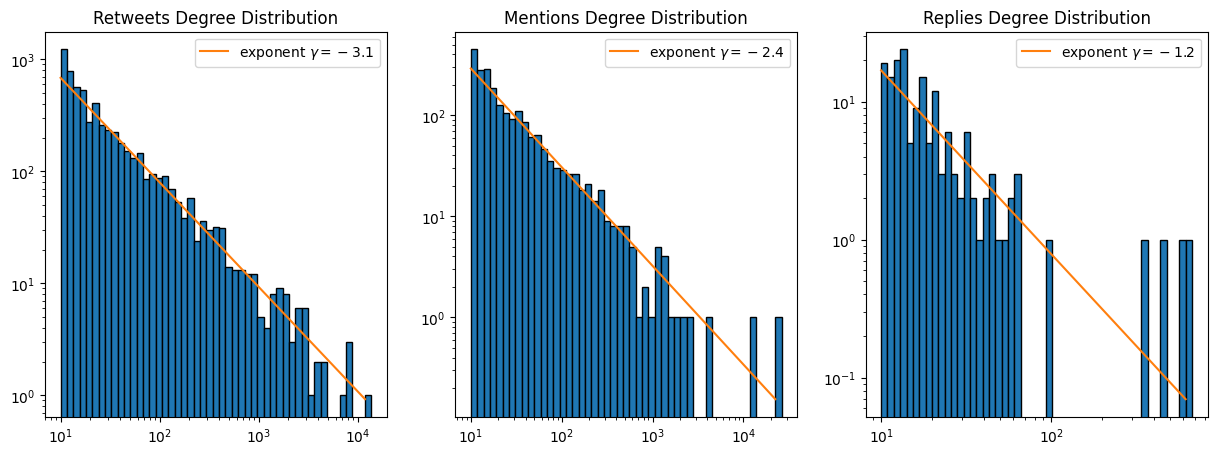

In [170]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, g, lbl in zip(axes, [retweets, mentions, replies], ['Retweets', 'Mentions', 'Replies']):
    degree = [d for _, d in g.degree]
    print(f'{lbl} max degree: {max(degree)}')
    print(f'{lbl} min degree: {min(degree)}')
    print()

    y, bins, _ = ax.hist(degree, bins=np.logspace(1, np.log10(max(degree))), edgecolor='k')
    x = bins[:-1]
    poly = np.polynomial.Polynomial.fit(np.log(x[y > 1]), np.log(y[y > 1]), 1)
    ax.plot(x, np.exp(poly(np.log(x))), label=f'exponent $\gamma = {poly.coef[1]:.1f}$')

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(f'{lbl} Degree Distribution')

    ax.legend();

Degree distributions are close to powerlaw functions with heavy tails.

## Clustering

In [171]:
for g, lbl in zip([retweets, mentions, replies], ['Retweets', 'Mentions', 'Replies']):
    h = g.to_undirected()
    print(f'{lbl} clustering: {nx.average_clustering(h)}')

Retweets clustering: 0.017922926252994596
Mentions clustering: 0.17906620747117083
Replies clustering: 0.00223312244395489


## Multiplexity: Cascade of Failures Experiment

Original experiment:
- Buldyrev, S., Parshani, R., Paul, G. et al. Catastrophic cascade of failures in interdependent networks. Nature 464, 1025–1028 (2010). https://doi.org/10.1038/nature08932

Cascade of failures example

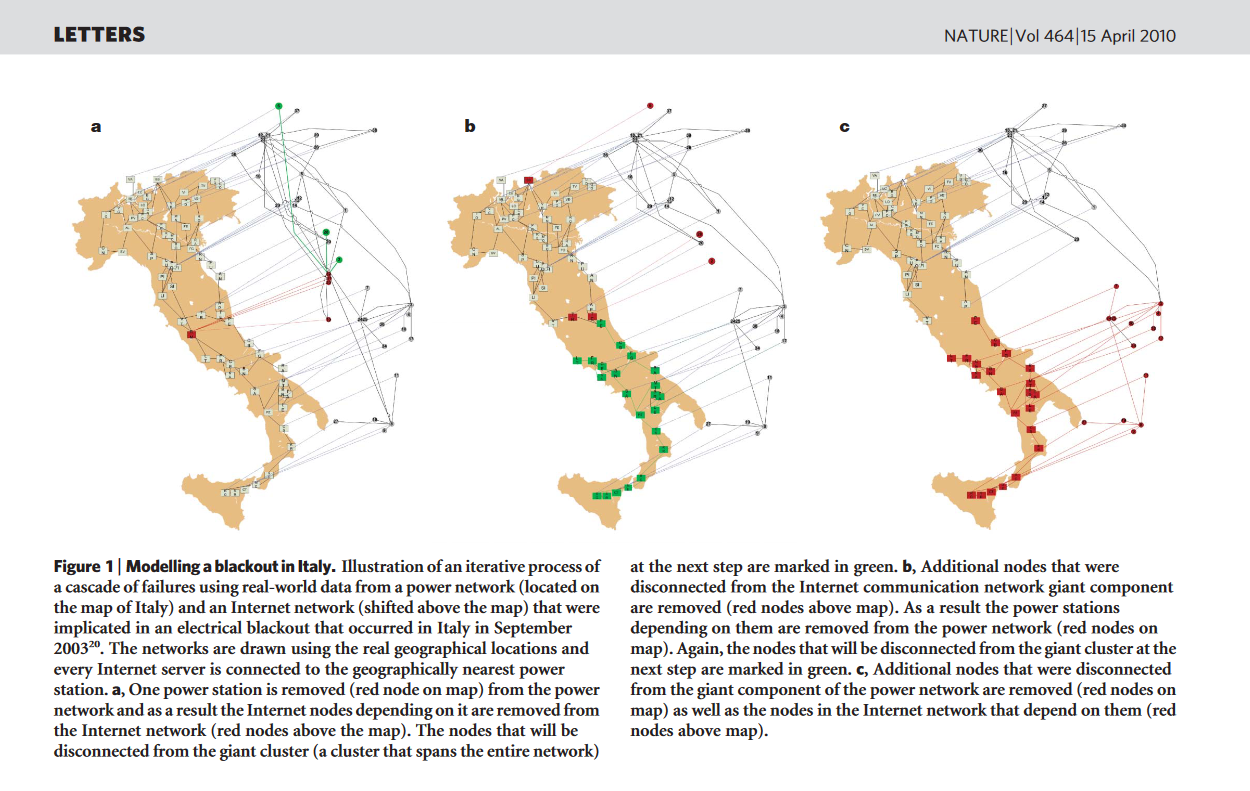

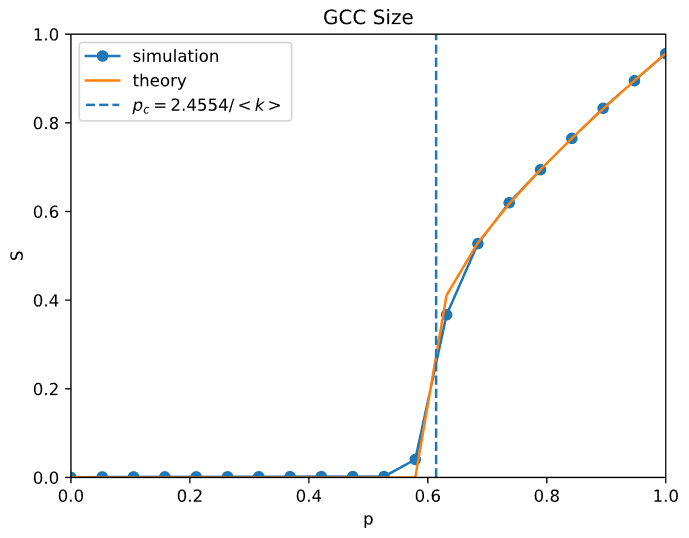

Let's model a simplified cascade of failres - "cascade of bans":
- the most commonly **replied** user gets banned
- all users that **retweeted** their posts, **mentioned** their nickname and/or replied to them get banned, too.

What proportion of users will be left in the network?

In [233]:
retweets_c = deepcopy(retweets)
mentions_c = deepcopy(mentions)
replies_c = deepcopy(replies)

In [234]:
degrees = {n: d for n, d in replies_c.in_degree}
most_replied = max(degrees, key=lambda x: degrees[x])
print(f'User #{most_replied} got {replies_c.in_degree[2]} replies')
retweeters = retweets_c.reverse()[most_replied]
print(f'They were retweeted by {len(retweeters)} users')
mentioners = mentions_c.reverse()[most_replied]
print(f'and mentioned by {len(mentioners)} users')

User #2 got 668 replies
They were retweeted by 8630 users
and mentioned by 26360 users


In [235]:
try:
    # Remove those who retweeted them, mentioned them, replied to them:
    for g in [retweets_c, mentions_c, replies_c]:
        g.remove_nodes_from(replies.reverse()[most_replied])
        g.remove_nodes_from(mentions.reverse()[most_replied])
        g.remove_nodes_from(retweets.reverse()[most_replied])

    # Remove the user from all layers.
    retweets_c.remove_node(most_replied)
    mentions_c.remove_node(most_replied)
    replies_c.remove_node(most_replied)
except nx.NetworkXError:
    pass

In [247]:
for g_c, g, lbl in zip([retweets_c, mentions_c, replies_c], [retweets, mentions, replies], ['Retweets', 'Mentions', 'Replies']):
    print(f'{len(g) - len(g_c)} users ({(len(g) - len(g_c)) / len(g) * 100:.1f}%) were removed from the {lbl} layer')
    
    scc = list(nx.strongly_connected_components(g))
    lenmax = max([len(c) for c in scc])
    print(f'Length of the largest SCC before the cascade of bans: {lenmax}')
    
    scc = list(nx.strongly_connected_components(g_c))
    lenmax = max([len(c) for c in scc])
    print(f'Length of the largest SCC after the cascade of bans: {lenmax}')
    print()

30678 users (9.5%) were removed from the Retweets layer
Length of the largest SCC before the cascade of bans: 1292
Length of the largest SCC after the cascade of bans: 7

28689 users (24.3%) were removed from the Mentions layer
Length of the largest SCC before the cascade of bans: 941
Length of the largest SCC after the cascade of bans: 11

3728 users (15.6%) were removed from the Replies layer
Length of the largest SCC before the cascade of bans: 29
Length of the largest SCC after the cascade of bans: 4



The net became comletely defragmented into small disconnected communities. This is an example of a situation that is more likely to happen in multiplex networks rather than in a single network.

## References

- Unraveling the Origin of Social Bursts in Collective Attention. M. De Domenico, E. G. Altmann. Scientific Reports 2020 10, 4629
- Buldyrev, S., Parshani, R., Paul, G. et al. Catastrophic cascade of failures in interdependent networks. Nature 464, 1025–1028 (2010). https://doi.org/10.1038/nature08932